<a href="https://colab.research.google.com/github/asghargit/asghar2/blob/main/MNIST_Learning_image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

this is for avoiding overfitting

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [11]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop],
                    batch_size=64)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7677 - loss: 0.6646 - val_accuracy: 0.7187 - val_loss: 0.8229
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7791 - loss: 0.6281 - val_accuracy: 0.7131 - val_loss: 0.8295
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7882 - loss: 0.5978 - val_accuracy: 0.7119 - val_loss: 0.8545
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8012 - loss: 0.5607 - val_accuracy: 0.7114 - val_loss: 0.8681


In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 1s - 5ms/step - accuracy: 0.7187 - loss: 0.8229
Test accuracy: 0.7186999917030334


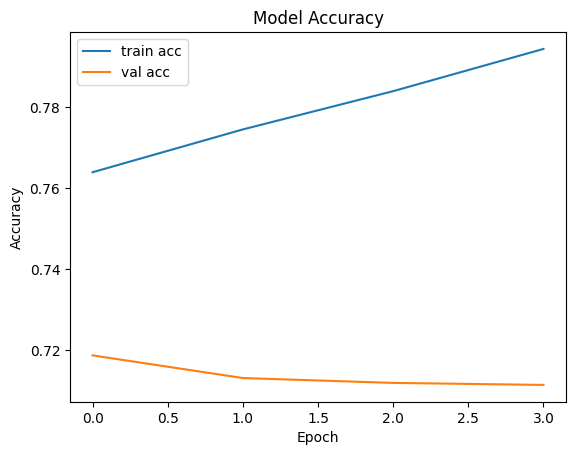

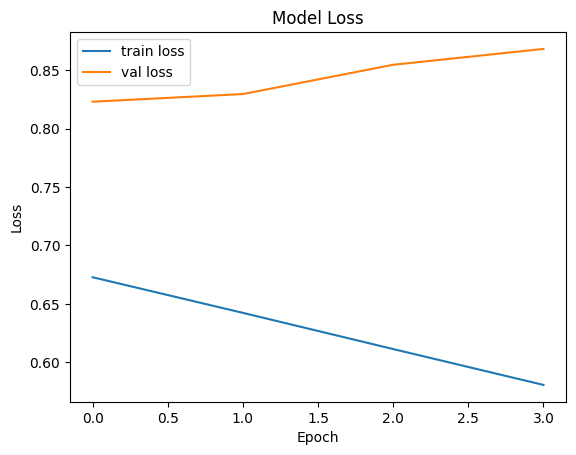

In [13]:
import matplotlib.pyplot as plt

# 🔹 Plot Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 🔹 Plot Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [15]:
# Predict on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)   # predicted labels
y_true = y_test.flatten()                    # true labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


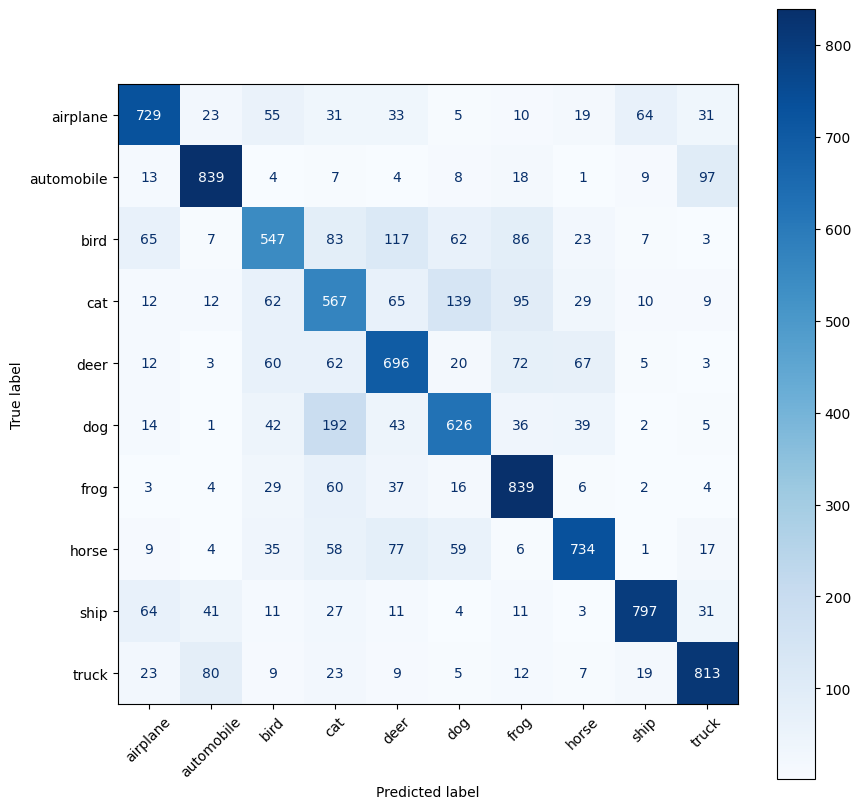

In [16]:
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[
                                  'airplane','automobile','bird','cat','deer',
                                  'dog','frog','horse','ship','truck'
                              ])

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.show()
